In [2]:
import pandas as pd
import numpy as np
import math
from math import sqrt,pow
import matplotlib.pyplot as plt
from decimal import Decimal
import scipy
from scipy import stats
from scipy import spatial
from scipy.spatial import distance
from scipy.stats import pearsonr
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
class BookRecommendation:
    
    def __init__(self, dataset):
        self.load_datasets()
            
    def load_datasets(self):
        #Load data into class from Books dataset#
        self.books = pd.read_csv('Books.csv', sep=';', error_bad_lines = False, warn_bad_lines=False)
        self.books.columns = ['ISBN','Book-Title','Book-Author','YearofPublication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'] 
        self.users = pd.read_csv('Users.csv', sep=';', error_bad_lines = False, warn_bad_lines=False)
        self.users.columns = ['UserId', 'Location', 'Age']
        self.ratings = pd.read_csv('Book-Ratings.csv', sep=';', error_bad_lines = False, warn_bad_lines=False)
        self.ratings.columns = ['UserId', 'ISBN', 'BookRating']     
        
        
    def target_user_info(self,user_id):
        check_ratings = pd.DataFrame(self.ratings[self.ratings['UserId'] == user_id])
        merge_details = check_ratings.merge(self.books,on='ISBN')
        merge_details = merge_details.merge(self.users,on='UserId')
        return merge_details
    
    def user_ratings(self,user_id1,user_id2):
        userid1 = self.target_user_info(user_id1)
        userid2 = self.target_user_info(user_id2)
        common_ratings = pd.merge(userid1,userid1, how='inner', on=['ISBN'])[['UserId_x', 'ISBN', 'BookRating_x', 'Book-Title_x', 'Location_x', 'Age_x', 'UserId_y',
       'BookRating_y', 'Location_y', 'Age_y']]
        return common_ratings.head()
    
    def com_user_ratings(self,user_id1,user_id2):
        userid1 = self.target_user_info(user_id1)
        userid2 = self.target_user_info(user_id2)
        common_ratings = pd.merge(userid1,userid2, how='inner', on=['ISBN'])[['UserId_x', 'ISBN', 'BookRating_x', 'Book-Title_x', 'Location_x', 'Age_x', 'UserId_y',
       'BookRating_y', 'Location_y', 'Age_y']]
        return list(common_ratings['BookRating_x']),list(common_ratings['BookRating_y'])
        
    #calculating squared euclidean distance using com_user_ratings
    def squared_euclidean_similarity(self,user_id1, user_id2):
        user1, user2 = self.com_user_ratings(user_id1, user_id2)
        result = sqrt(sum(pow(a-b,2) for a, b in zip(user1, user2)))
        return result
    
    #calculating minkowski distance
    def minkowski_distance_similarity(self,user_id1, user_id2):    
        def p_root(x, y):
            root = 1 / float(y)
            return round(Decimal(x) ** Decimal(root), 3)
        
        user1, user2 = self.com_user_ratings(user_id1, user_id2)
        result = (p_root(sum(pow(abs(a - b), 3) for a, b in zip(user1, user2)), 3))
        return result
    
    #calculating hamming distance
    def hamming_distance_similarity(self,user_id1, user_id2):
        user1, user2 = self.com_user_ratings(user_id1, user_id2)
        result = distance.hamming(user1, user2)
        return result
    
    def pearson_correlation(self,user_id1, user_id2):
        user1, user2 = self.com_user_ratings(user_id1, user_id2)
        result = pearsonr(user1, user2)
        return result

    def spearman_correlation_distance(self,user_id1, user_id2):
        user1, user2 = self.com_user_ratings(user_id1, user_id2)
        result = stats.spearmanr(user1, user2)
        return result
    
    def chebyshave_distance(self,user_id1, user_id2):
        user1, user2 = self.com_user_ratings(user_id1, user_id2)
        result = distance.chebyshev(user1, user2)
        return result
    
    def book_identify(self, isbn):
        book = pd.DataFrame(self.books[self.books["ISBN"]==isbn])
        return book

    def cosine_similarity_new(self, book1_isbn, book2_isbn):
        book1 = self.book_identify(book1_isbn)
        book2 = self.book_identify(book2_isbn)
        tfidf_vector = TfidfVectorizer()
        tfidf_matrix = tfidf_vector.fit_transform(book1)
        result_cos = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
        result = result_cos[0][1]
        return result
      
     # Ratings count of most rated books are print in descending order  
    def print_most_rated_books(self,number=11):
        most_rated = self.ratings.groupby('ISBN')['BookRating'].count().nlargest(number)
        most_rated_books = pd.merge(most_rated,self.books,on='ISBN')
        return most_rated_books   
    
    def plot_ratings(self):
        self.ratings.BookRating.value_counts(sort=False).plot(kind='bar')
        plt.title('Rating-Distribution\n')
        plt.xlabel('Ratings')
        plt.ylabel('Count of Ratings')
        plt.show()
    
    def age_plot(self):
        self.users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
        plt.title('Age-Distribution\n')
        plt.xlabel('Age-Range')
        plt.ylabel('Count of Users')
        plt.show()        

In [4]:
recom_sys = BookRecommendation(True)

C:\Users\Rekha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
recom_sys.books.head()

,ISBN,Book-Title,Book-Author,YearofPublication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
recom_sys.books.shape

(271360, 8)

In [7]:
recom_sys.users.head()

,UserId,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
recom_sys.users.shape

(278858, 3)

In [9]:
recom_sys.ratings.head()

,UserId,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
recom_sys.ratings.shape

(1149780, 3)

In [11]:
recom_sys.minkowski_distance_similarity(250764,250709)

Decimal('5.000')

In [12]:
recom_sys.squared_euclidean_similarity(250764,278418)

15.524174696260024

In [13]:
recom_sys.spearman_correlation_distance(278418,76352)

SpearmanrResult(correlation=-0.02517432757079305, pvalue=0.7323511216101773)

In [14]:
recom_sys.chebyshave_distance(278418,250764)

8

In [15]:
recom_sys.cosine_similarity_new(1555878199,1562010182)

0.0

In [16]:
recom_sys.print_most_rated_books()

,ISBN,BookRating,Book-Title,Book-Author,YearofPublication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,2502,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,883,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
5,044023722X,647,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
6,0142001740,615,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
7,067976402X,614,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...
8,0671027360,586,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
9,0446672211,585,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...


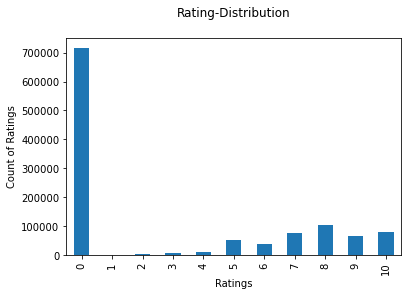

In [17]:
recom_sys.plot_ratings()

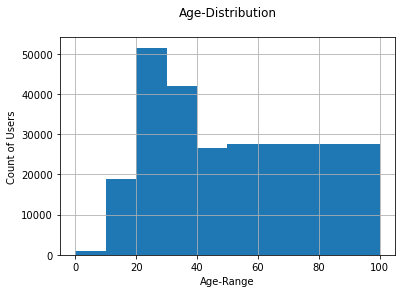

In [18]:
recom_sys.age_plot()